## Importing libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x62a12b0>

## Assignment #1
1. Load the data gapminder.csv
2. Use pandas to create a boxplot showing the variation of life expectancy ('life') by region ('Region').
3. Use the get_dummies function to create dummy variables for the dataframe.
4. Remove one extra dummy column
5. Do a linear Regression on the dataset and caculate the score.
6. Make some plots which you like by yourself.

## Loading the dataset

In [3]:
gmfile_path = r'C:\Users\student\Documents\Python Scripts\datasets\gm_2008_region.csv'

gap = pd.read_csv (gmfile_path)
print (gap.info ())
print (gap.shape)
gap.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.4+ KB
None
(139, 10)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,Europe & Central Asia
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,Europe & Central Asia
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,America
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,South Asia
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,America


## Plotting life v/s Region

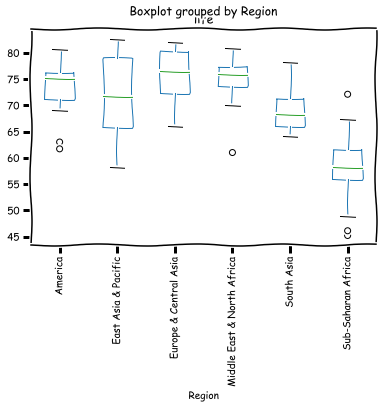

In [4]:
gap.boxplot ('life', 'Region', rot = 90)

## Separating categorial features and changing values into numeric type

In [5]:
gap_Region = pd.get_dummies (gap)
gap_Region.head ()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


## Dropping region: Sub-Saharan Africa

In [6]:
gap_Region.drop ('Region_Sub-Saharan Africa', axis = 1, inplace = True)
print (gap_Region.shape)
gap_Region.head ()

(139, 14)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0


## Splitting dataset, training regression model

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = gap_Region.drop('life', axis = 1).values
Y = gap_Region['life'].values

print (X.shape, Y.shape)

# for test_size 0.2, seed = 15 best score!!
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 15)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


lr = LinearRegression ()
lr.fit (x_train, y_train)
predictions = lr.predict(x_test)
print ('Score:',lr.score (x_test, y_test))

(139, 13) (139,)
(111, 13) (111,)
(28, 13) (28,)
Score: 0.9446851248573285


## Plotting score v/s random_state

0.9047219333435934
15


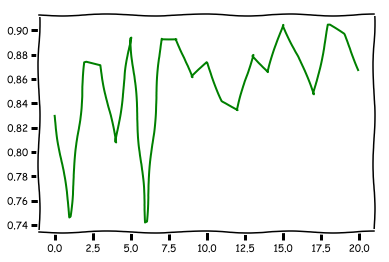

In [8]:
score = []
for i in range (21):
    x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3, random_state = i)
    lr = LinearRegression ()
    lr.fit (x_train, y_train)
    score.append (lr.score (x_test, y_test))
    
print (max (score))
for i in range (21):
    if score[i] == max (score):
        print (i)
        break

plt.plot (range (21), score, c='g')

## Plotting score v/s test_size

0.9446851248573287
0.2


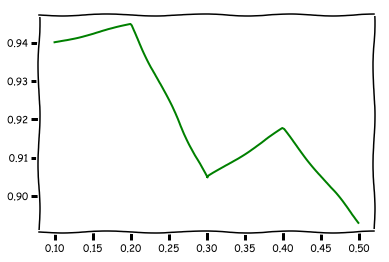

In [9]:
score = []
test_range = [0.1, 0.2, 0.3, 0.4, 0.5]
for t in test_range:
    x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = t, random_state = 15)
    lr = LinearRegression ()
    lr.fit (x_train, y_train)
    score.append (lr.score (x_test, y_test))
    
print (max (score))
for i in range (len (test_range)):
    if score[i] == max (score):
        print (test_range[i])
        break

plt.plot (test_range, score, c='g')

## Assignment #2

1. Load the voting datasets (called as house representatives)
2. Find how all the missing values are represented
3. Take one type of missing value and convert it to NaN
4. Count the number of nulls using isnull() and sum()
5. Drop the rows using dropna
6. Use Imputer to replace the missing values with most_frequent
7. Use pipeline to create a pipeline and do classification.
8. Use the fit and predict to get the accuracy.

In [67]:
votefile_path = r'C:\Users\student\Documents\Python Scripts\datasets\house-votes-84.csv'

vote = pd.read_csv (votefile_path)
print (vote.info ())
vote.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [68]:
cols = vote.columns[1:]
print (cols)
for i in cols:
    print (min (vote[vote[i] == '?'].count ()))

Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
12
48
11
11
15
11
14
15
22
7
21
31
25
17
28
104


In [69]:
for i in cols:
    vote[i].replace ('?', np.nan, inplace = True)
print (vote.isnull ().sum ())
print (vote.shape)

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64
(435, 17)


In [73]:
vote.replace ('y', 1, inplace = True)
vote.replace ('n', 0, inplace = True)
vote.head (10)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [66]:
vote.dropna (inplace = True)
print (vote.isnull ().sum ())
print (vote.shape)

party                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64
(232, 17)


In [74]:
from sklearn.preprocessing import Imputer

X = vote.iloc[:, 1:]
Y = vote.iloc[:, 0]

imp = Imputer (missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imp.fit (X)
imp.transform (X)


array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

steps = [('imp', Imputer (missing_values = 'NaN', strategy = 'most_frequent', axis = 0)),
         ('clsf', KNeighborsClassifier (n_neighbors = 10))]

pipeline =  Pipeline (steps)

X_train, X_test, Y_train, Y_test = train_test_split (X, )

pipeline.fit ()

## Assignment #3

1. Load the white wine datasets
2. Look for the features, if there are any anamoly
3. Scale the features using scale() funciton
4. Check the values of mean and std of the transformed object
5. Create a pipeline with Scaling and Knearest neighbors
6. Now compute the accuracy with the scaled models and unscaled models

In [ ]:
winefile_path = r'C:\Users\student\Documents\Python Scripts\datasets\white-wine.csv'

wine = pd.read_csv (winefile_path)
print (wine.info ())

In [ ]:
wine

In [ ]:
wine.quality.unique ()